<a href="https://colab.research.google.com/github/RAGILSAPUTRI/AI_TUGAS/blob/main/DigitRecognizer_CNN__RAGIL_SAPUTRI_DATA_SCIENCE_DEEP_LEARNING_FULL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau


In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
df_train.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_train.isnull().sum()

,0
label,0
pixel0,0
pixel1,0
pixel2,0
pixel3,0
...,...
pixel779,0
pixel780,0
pixel781,0
pixel782,0


#Transformasi Data (Data Transformation)
1. Normalisasi & Reshape

In [6]:
y_train  = df_train['label'].values # np array of all the labels (42000, )
X_train = df_train.drop(columns=['label']).values.reshape(-1,28,28,1)/255.0 # drop the labels and reshape (num_rows, height , width , channel)
X_test = df_test.values.reshape(-1, 28, 28, 1) / 255.0 # /255.0 --> ormalizing these pixel values to the range [0, 1]

#Encoding

In [7]:
y_train_encoded = to_categorical(y_train, num_classes=10)

# <p style="background-color:#F8F1E8; font-family:newtimeroman;color:#602F44; font-size:150%; text-align:center; border-radius: 15px 50px;"> Data Visualisasi
 📊</p>



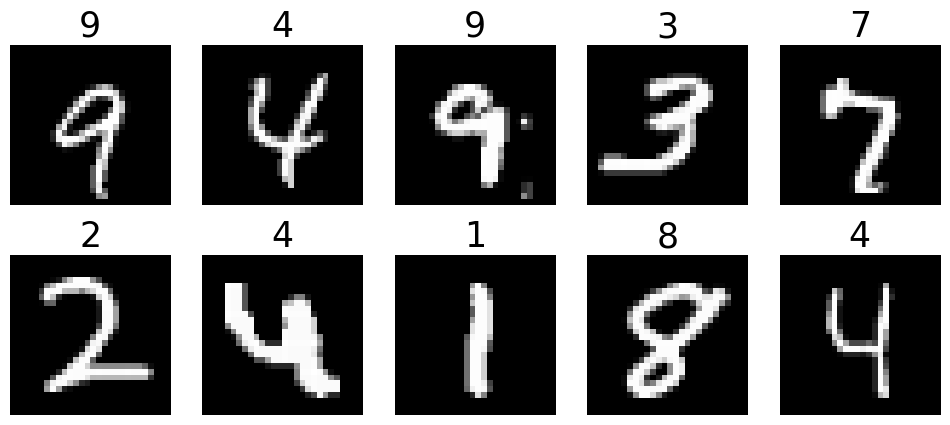

In [33]:
fig , axes  = plt.subplots(2, 5, figsize=(12,5))
axes   = axes.flatten()
idx = np.random.randint(0, 42000, size=10)
for i in range(10):
    axes[i].imshow(X_train[idx[i], :].reshape(28,28), cmap='gray')
    axes[i].axis('off') # hide the axes ticks
    axes[i].set_title(str(int(y_train[idx[i]])), color='black', fontsize=25)
plt.show()

# <p style="background-color:#F8F1E8; font-family:newtimeroman;color:#602F44; font-size:150%; text-align:center; border-radius: 15px 50px;"> Model ⚖️</p>


#Arsitektur Model

In [10]:
model = models.Sequential([

    layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)),
    layers.Conv2D(filters=64, kernel_size=3, padding='same',activation='relu'),
    layers.Conv2D(filters=128, kernel_size=3, padding='same',activation='relu'),
    layers.MaxPool2D(pool_size=2),

    layers.Conv2D(filters=128, kernel_size=3, padding='same',activation='relu'),
    layers.Conv2D(filters=192, kernel_size=3, padding='same',activation='relu'),
    layers.MaxPool2D(pool_size=2),

    layers.Conv2D(filters=192, kernel_size=5, padding='same',activation='relu'),
    layers.MaxPool2D(pool_size=2, padding='same'),

    layers.Flatten(),

    layers.Dense(units=256, activation='relu'),
    layers.Dense(units=10, activation='softmax'),
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 192)    │       221,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 192)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 192)      │       921,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 192)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,191,434 (8.36 MB)

 Trainable params: 2,191,434 (8.36 MB)

 Non-trainable params: 0 (0.00 B)

 #SPLIT DATA & Teknik Pelatihan dan Validasi & Metrik Evaluasi


In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.3, verbose=1,
                              patience=2, min_lr=0.00000001)

history = model.fit(
    X_train, y_train_encoded,
    epochs=25,
    validation_split=0.1,
    callbacks=[reduce_lr],
)

Epoch 1/25
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 1135s 957ms/step - accuracy: 0.8832 - loss: 0.3484 - val_accuracy: 0.9836 - val_loss: 0.0490 - learning_rate: 0.0010
Epoch 2/25
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 1151s 948ms/step - accuracy: 0.9861 - loss: 0.0472 - val_accuracy: 0.9888 - val_loss: 0.0358 - learning_rate: 0.0010
Epoch 3/25
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 1169s 954ms/step - accuracy: 0.9911 - loss: 0.0296 - val_accuracy: 0.9914 - val_loss: 0.0262 - learning_rate: 0.0010
Epoch 4/25
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 1169s 960ms/step - accuracy: 0.9926 - loss: 0.0246 - val_accuracy: 0.9902 - val_loss: 0.0305 - learning_rate: 0.0010
Epoch 5/25
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 1157s 956ms/step - accuracy: 0.9934 - loss: 0.0202 - val_accuracy: 0.9929 - val_loss: 0.0258 - learning_rate: 0.0010
Epoch 6/25
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 1171s 964ms/step - accuracy: 0.9956 - loss: 0.0147 - val_accuracy: 0.9902 - val_loss: 0.0335 - learning_rate: 0.0010
Epoch 7/25
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 1154

In [13]:
model.save("model_digit_recognizer.h5")

#FUNGSI LOSS

<Axes: >

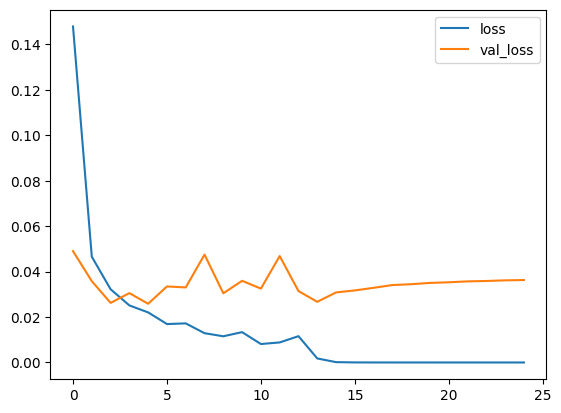

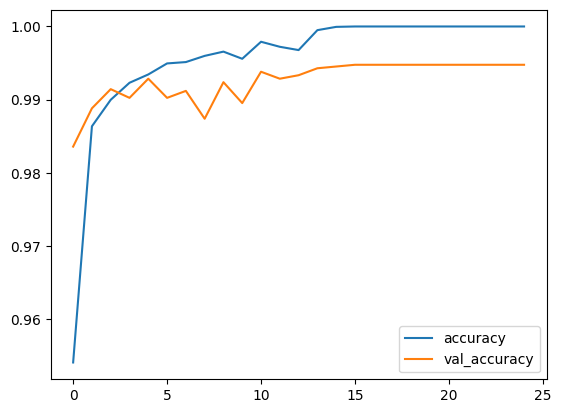

In [14]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[: , ['loss', 'val_loss']].plot()
history_frame.loc[: , ['accuracy', 'val_accuracy']].plot()

In [15]:
# Make predictions for competition submission
predictions = model.predict(X_test)


875/875 ━━━━━━━━━━━━━━━━━━━━ 219s 250ms/step


In [16]:
predictions

array([[0.0000000e+00, 6.3720353e-34, 9.9999994e-01, ..., 1.6631197e-27,
        1.1905449e-31, 0.0000000e+00],
       [9.9999994e-01, 2.0584614e-36, 3.9037759e-26, ..., 2.4268344e-25,
        4.9027955e-30, 9.4966310e-25],
       [5.4391609e-18, 2.9085558e-24, 5.9910390e-21, ..., 1.7953366e-17,
        7.0028693e-14, 9.9999994e-01],
       ...,
       [0.0000000e+00, 3.1376807e-34, 1.3669990e-38, ..., 9.1327251e-38,
        1.4069160e-30, 0.0000000e+00],
       [1.4706083e-17, 7.3283436e-21, 6.4838682e-20, ..., 3.4183054e-15,
        1.8005295e-16, 9.9999994e-01],
       [0.0000000e+00, 4.3077779e-38, 9.9999994e-01, ..., 6.2831264e-30,
        5.2094801e-34, 0.0000000e+00]], dtype=float32)

In [17]:
# Convert the model's probability outputs to digit predictions
predicted_labels = np.argmax(predictions, axis=1)

# Create a DataFrame for the submission
submission = pd.DataFrame({
    "ImageId": range(1, len(predicted_labels) + 1),  # ImageId starts from 1
    "Label": predicted_labels
})

# Save the DataFrame to a CSV file
submission.to_csv('submission.csv', index=False)

In [18]:
# Menyimpan model dalam format .h5
model.save('model_digit_recognizer.h5')
print("Model berhasil disimpan.")


Model berhasil disimpan.


#UNTUK LOAD MODEL


In [19]:
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Memuat model yang sudah disimpan
model = load_model('model_digit_recognizer.h5')
print("Model berhasil dimuat.")


Model berhasil dimuat.


In [20]:
from tensorflow.keras.models import load_model
model = load_model("model_digit_recognizer.h5")


#INI

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


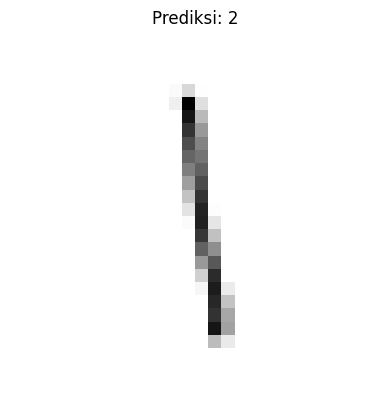

In [28]:
# Membaca gambar (pastikan 28x28 piksel dan grayscale)
image_path = 'Angka_1_wh.jpg'  # Ganti dengan nama file gambar kamu
img = Image.open(image_path).convert('L')  # Convert ke grayscale
img = img.resize((28, 28))  # Resize ke 28x28
img_array = np.array(img)

# Invers warna jika background putih (optional, tergantung gambar)
img_array = 255 - img_array

# Normalisasi dan ubah bentuk
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi: {predicted_label}')
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


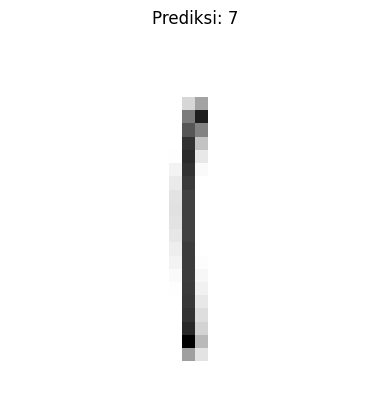

In [29]:
# Membaca gambar (pastikan 28x28 piksel dan grayscale)
image_path = 'Angka_1.2_wh.jpg'  # Ganti dengan nama file gambar kamu
img = Image.open(image_path).convert('L')  # Convert ke grayscale
img = img.resize((28, 28))  # Resize ke 28x28
img_array = np.array(img)

# Invers warna jika background putih (optional, tergantung gambar)
img_array = 255 - img_array

# Normalisasi dan ubah bentuk
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi: {predicted_label}')
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


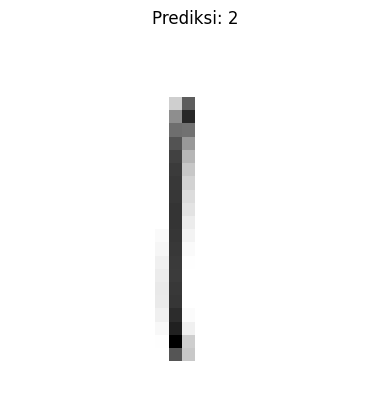

In [31]:
# Membaca gambar (pastikan 28x28 piksel dan grayscale)
image_path = 'Angka_1.3_wh.jpg'  # Ganti dengan nama file gambar kamu
img = Image.open(image_path).convert('L')  # Convert ke grayscale
img = img.resize((28, 28))  # Resize ke 28x28
img_array = np.array(img)

# Invers warna jika background putih (optional, tergantung gambar)
img_array = 255 - img_array

# Normalisasi dan ubah bentuk
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi: {predicted_label}')
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


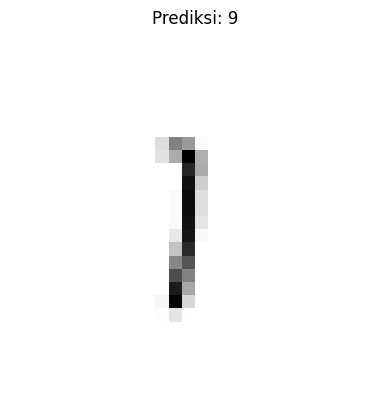

In [34]:
# Membaca gambar (pastikan 28x28 piksel dan grayscale)
image_path = 'Angka_1.4_wh.jpg'  # Ganti dengan nama file gambar kamu
img = Image.open(image_path).convert('L')  # Convert ke grayscale
img = img.resize((28, 28))  # Resize ke 28x28
img_array = np.array(img)

# Invers warna jika background putih (optional, tergantung gambar)
img_array = 255 - img_array

# Normalisasi dan ubah bentuk
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi: {predicted_label}')
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


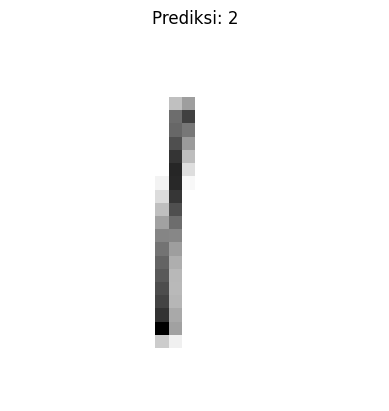

In [35]:
# Membaca gambar (pastikan 28x28 piksel dan grayscale)
image_path = 'Angka_1.5_wh.jpg'  # Ganti dengan nama file gambar kamu
img = Image.open(image_path).convert('L')  # Convert ke grayscale
img = img.resize((28, 28))  # Resize ke 28x28
img_array = np.array(img)

# Invers warna jika background putih (optional, tergantung gambar)
img_array = 255 - img_array

# Normalisasi dan ubah bentuk
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi: {predicted_label}')
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


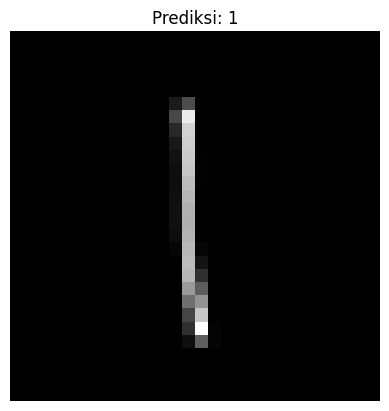

In [30]:
# Membaca gambar (pastikan 28x28 piksel dan grayscale)
image_path = 'Angka_1_bl.jpg'  # Ganti dengan nama file gambar kamu
img = Image.open(image_path).convert('L')  # Convert ke grayscale
img = img.resize((28, 28))  # Resize ke 28x28
img_array = np.array(img)

# Invers warna jika background putih (optional, tergantung gambar)
img_array = 255 - img_array

# Normalisasi dan ubah bentuk
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi: {predicted_label}')
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


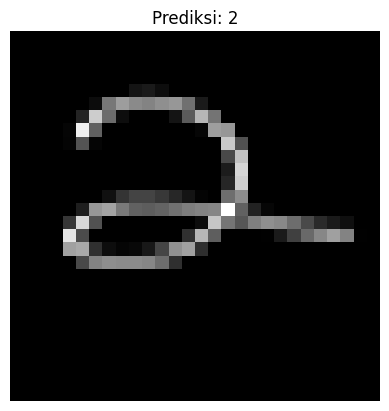

In [ ]:
# Membaca gambar (pastikan 28x28 piksel dan grayscale)
image_path = 'Angka_2_bl.jpg'  # Ganti dengan nama file gambar kamu
img = Image.open(image_path).convert('L')  # Convert ke grayscale
img = img.resize((28, 28))  # Resize ke 28x28
img_array = np.array(img)

# Invers warna jika background putih (optional, tergantung gambar)
img_array = 255 - img_array

# Normalisasi dan ubah bentuk
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi: {predicted_label}')
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


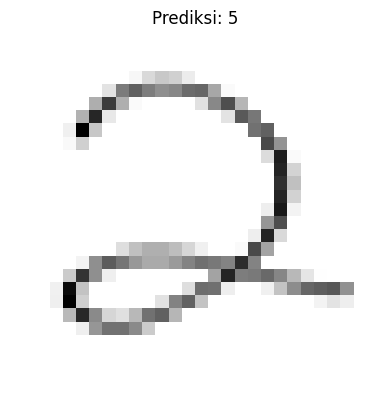

In [ ]:
# Membaca gambar (pastikan 28x28 piksel dan grayscale)
image_path = 'Angka_2_wh.jpg'  # Ganti dengan nama file gambar kamu
img = Image.open(image_path).convert('L')  # Convert ke grayscale
img = img.resize((28, 28))  # Resize ke 28x28
img_array = np.array(img)

# Invers warna jika background putih (optional, tergantung gambar)
img_array = 255 - img_array

# Normalisasi dan ubah bentuk
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi: {predicted_label}')
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


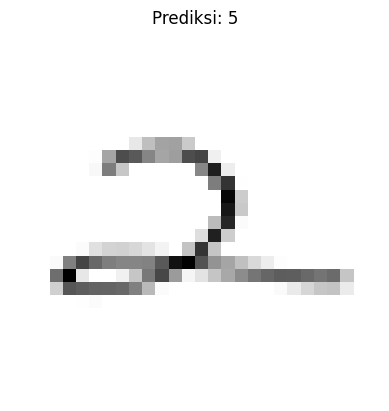

In [ ]:
# Membaca gambar (pastikan 28x28 piksel dan grayscale)
image_path = 'Angka_2.2_wh.jpg'  # Ganti dengan nama file gambar kamu
img = Image.open(image_path).convert('L')  # Convert ke grayscale
img = img.resize((28, 28))  # Resize ke 28x28
img_array = np.array(img)

# Invers warna jika background putih (optional, tergantung gambar)
img_array = 255 - img_array

# Normalisasi dan ubah bentuk
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi: {predicted_label}')
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


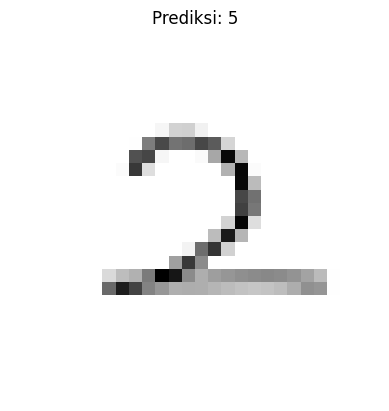

In [ ]:
# Membaca gambar (pastikan 28x28 piksel dan grayscale)
image_path = 'Angka_2.3_wh.jpg'  # Ganti dengan nama file gambar kamu
img = Image.open(image_path).convert('L')  # Convert ke grayscale
img = img.resize((28, 28))  # Resize ke 28x28
img_array = np.array(img)

# Invers warna jika background putih (optional, tergantung gambar)
img_array = 255 - img_array

# Normalisasi dan ubah bentuk
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi: {predicted_label}')
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


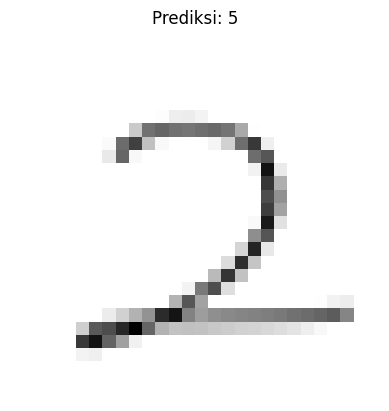

In [ ]:
# Membaca gambar (pastikan 28x28 piksel dan grayscale)
image_path = 'Angka_2.4_wh.jpg'  # Ganti dengan nama file gambar kamu
img = Image.open(image_path).convert('L')  # Convert ke grayscale
img = img.resize((28, 28))  # Resize ke 28x28
img_array = np.array(img)

# Invers warna jika background putih (optional, tergantung gambar)
img_array = 255 - img_array

# Normalisasi dan ubah bentuk
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi: {predicted_label}')
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


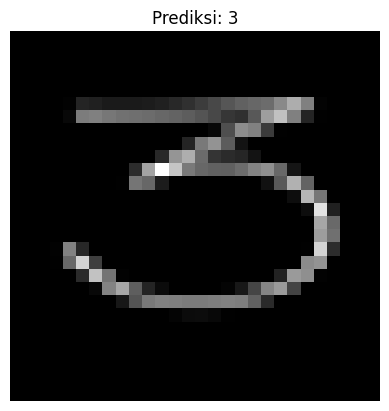

In [ ]:
# Membaca gambar (pastikan 28x28 piksel dan grayscale)
image_path = 'Angka_3_bl.jpg'  # Ganti dengan nama file gambar kamu
img = Image.open(image_path).convert('L')  # Convert ke grayscale
img = img.resize((28, 28))  # Resize ke 28x28
img_array = np.array(img)

# Invers warna jika background putih (optional, tergantung gambar)
img_array = 255 - img_array

# Normalisasi dan ubah bentuk
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi: {predicted_label}')
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


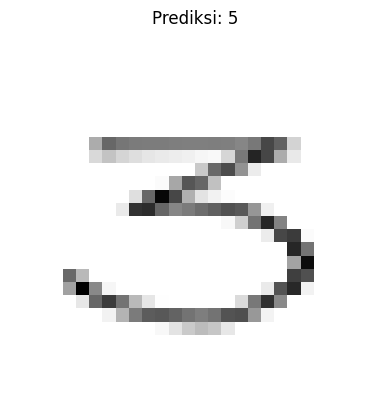

In [ ]:
# Membaca gambar (pastikan 28x28 piksel dan grayscale)
image_path = 'Angka_3_wh.jpg'  # Ganti dengan nama file gambar kamu
img = Image.open(image_path).convert('L')  # Convert ke grayscale
img = img.resize((28, 28))  # Resize ke 28x28
img_array = np.array(img)

# Invers warna jika background putih (optional, tergantung gambar)
img_array = 255 - img_array

# Normalisasi dan ubah bentuk
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi: {predicted_label}')
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


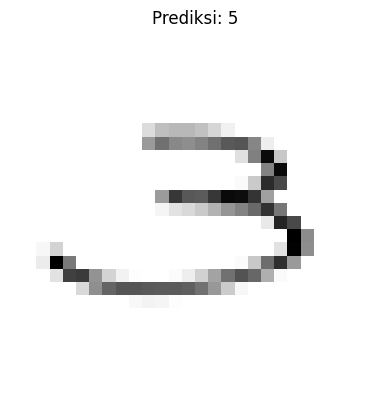

In [ ]:
# Membaca gambar (pastikan 28x28 piksel dan grayscale)
image_path = 'Angka_3.2_wh.jpg'  # Ganti dengan nama file gambar kamu
img = Image.open(image_path).convert('L')  # Convert ke grayscale
img = img.resize((28, 28))  # Resize ke 28x28
img_array = np.array(img)

# Invers warna jika background putih (optional, tergantung gambar)
img_array = 255 - img_array

# Normalisasi dan ubah bentuk
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi: {predicted_label}')
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


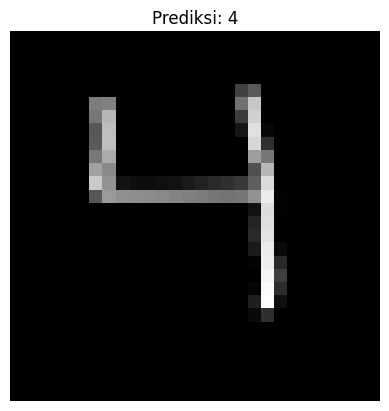

In [ ]:
# Membaca gambar (pastikan 28x28 piksel dan grayscale)
image_path = 'Angka_4.2_bl.jpg'  # Ganti dengan nama file gambar kamu
img = Image.open(image_path).convert('L')  # Convert ke grayscale
img = img.resize((28, 28))  # Resize ke 28x28
img_array = np.array(img)

# Invers warna jika background putih (optional, tergantung gambar)
img_array = 255 - img_array

# Normalisasi dan ubah bentuk
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi: {predicted_label}')
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


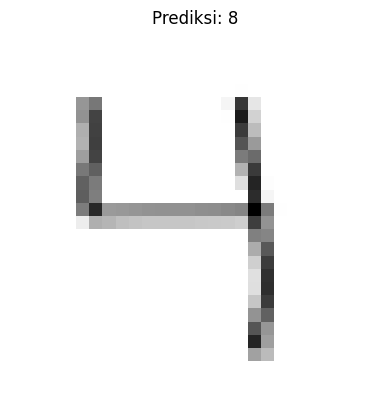

In [ ]:
# Membaca gambar (pastikan 28x28 piksel dan grayscale)
image_path = 'Angka_4_wh.jpg'  # Ganti dengan nama file gambar kamu
img = Image.open(image_path).convert('L')  # Convert ke grayscale
img = img.resize((28, 28))  # Resize ke 28x28
img_array = np.array(img)

# Invers warna jika background putih (optional, tergantung gambar)
img_array = 255 - img_array

# Normalisasi dan ubah bentuk
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi: {predicted_label}')
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


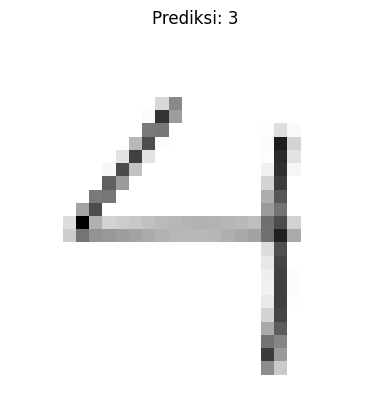

In [ ]:
# Membaca gambar (pastikan 28x28 piksel dan grayscale)
image_path = 'Angka_4.2_wh.jpg'  # Ganti dengan nama file gambar kamu
img = Image.open(image_path).convert('L')  # Convert ke grayscale
img = img.resize((28, 28))  # Resize ke 28x28
img_array = np.array(img)

# Invers warna jika background putih (optional, tergantung gambar)
img_array = 255 - img_array

# Normalisasi dan ubah bentuk
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi: {predicted_label}')
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


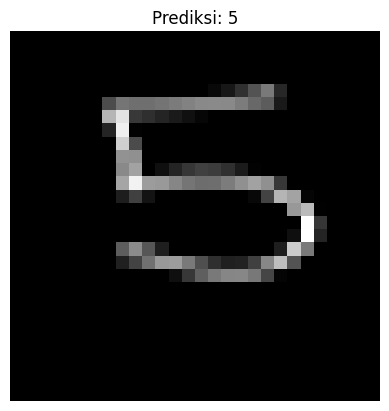

In [ ]:
# Membaca gambar (pastikan 28x28 piksel dan grayscale)
image_path = 'Angka_5_bl.jpg'  # Ganti dengan nama file gambar kamu
img = Image.open(image_path).convert('L')  # Convert ke grayscale
img = img.resize((28, 28))  # Resize ke 28x28
img_array = np.array(img)

# Invers warna jika background putih (optional, tergantung gambar)
img_array = 255 - img_array

# Normalisasi dan ubah bentuk
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi: {predicted_label}')
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


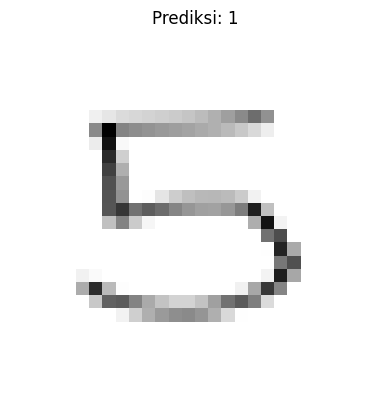

In [ ]:
# Membaca gambar (pastikan 28x28 piksel dan grayscale)
image_path = 'Angka_5_wh.jpg'  # Ganti dengan nama file gambar kamu
img = Image.open(image_path).convert('L')  # Convert ke grayscale
img = img.resize((28, 28))  # Resize ke 28x28
img_array = np.array(img)

# Invers warna jika background putih (optional, tergantung gambar)
img_array = 255 - img_array

# Normalisasi dan ubah bentuk
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi: {predicted_label}')
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


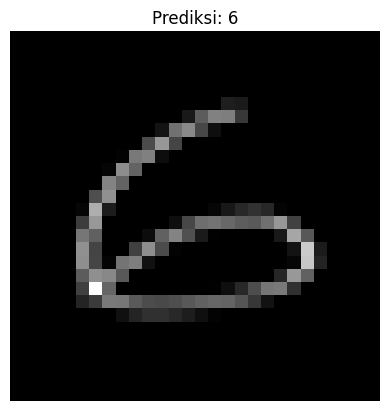

In [ ]:
# Membaca gambar (pastikan 28x28 piksel dan grayscale)
image_path = 'Angka_6_bl.jpg'  # Ganti dengan nama file gambar kamu
img = Image.open(image_path).convert('L')  # Convert ke grayscale
img = img.resize((28, 28))  # Resize ke 28x28
img_array = np.array(img)

# Invers warna jika background putih (optional, tergantung gambar)
img_array = 255 - img_array

# Normalisasi dan ubah bentuk
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi: {predicted_label}')
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


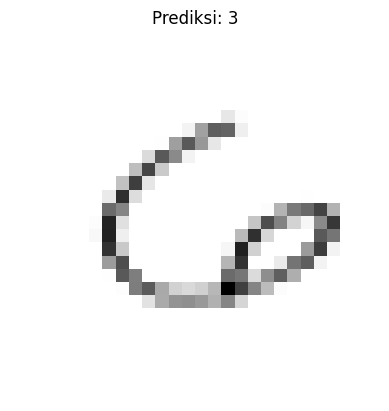

In [ ]:
# Membaca gambar (pastikan 28x28 piksel dan grayscale)
image_path = 'Angka_6_wh.jpg'  # Ganti dengan nama file gambar kamu
img = Image.open(image_path).convert('L')  # Convert ke grayscale
img = img.resize((28, 28))  # Resize ke 28x28
img_array = np.array(img)

# Invers warna jika background putih (optional, tergantung gambar)
img_array = 255 - img_array

# Normalisasi dan ubah bentuk
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi: {predicted_label}')
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


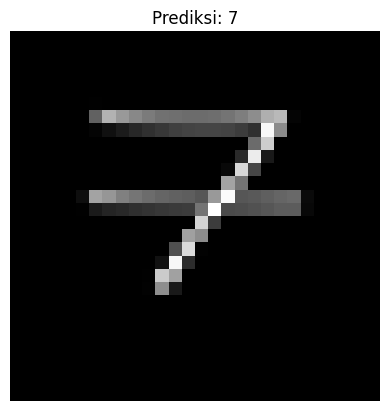

In [ ]:
# Membaca gambar (pastikan 28x28 piksel dan grayscale)
image_path = 'Angka_7_bl.jpg'  # Ganti dengan nama file gambar kamu
img = Image.open(image_path).convert('L')  # Convert ke grayscale
img = img.resize((28, 28))  # Resize ke 28x28
img_array = np.array(img)

# Invers warna jika background putih (optional, tergantung gambar)
img_array = 255 - img_array

# Normalisasi dan ubah bentuk
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi: {predicted_label}')
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


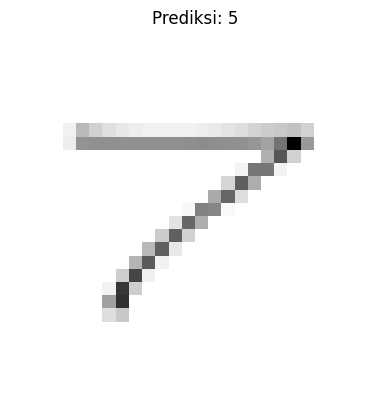

In [ ]:
# Membaca gambar (pastikan 28x28 piksel dan grayscale)
image_path = 'Angka_7_wh.jpg'  # Ganti dengan nama file gambar kamu
img = Image.open(image_path).convert('L')  # Convert ke grayscale
img = img.resize((28, 28))  # Resize ke 28x28
img_array = np.array(img)

# Invers warna jika background putih (optional, tergantung gambar)
img_array = 255 - img_array

# Normalisasi dan ubah bentuk
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi: {predicted_label}')
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


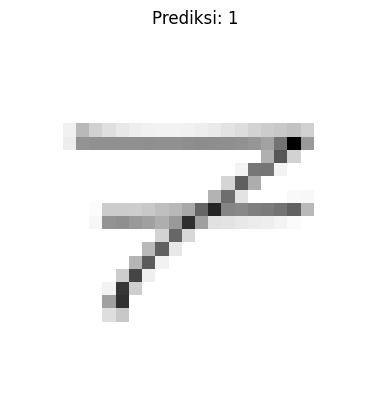

In [ ]:
# Membaca gambar (pastikan 28x28 piksel dan grayscale)
image_path = 'Angka_7.2_wh.jpg'  # Ganti dengan nama file gambar kamu
img = Image.open(image_path).convert('L')  # Convert ke grayscale
img = img.resize((28, 28))  # Resize ke 28x28
img_array = np.array(img)

# Invers warna jika background putih (optional, tergantung gambar)
img_array = 255 - img_array

# Normalisasi dan ubah bentuk
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi: {predicted_label}')
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


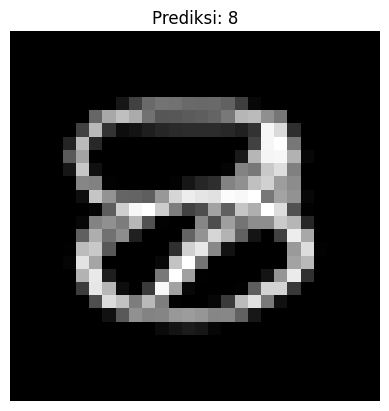

In [ ]:
# Membaca gambar (pastikan 28x28 piksel dan grayscale)
image_path = 'Angka_8_bl.jpg'  # Ganti dengan nama file gambar kamu
img = Image.open(image_path).convert('L')  # Convert ke grayscale
img = img.resize((28, 28))  # Resize ke 28x28
img_array = np.array(img)

# Invers warna jika background putih (optional, tergantung gambar)
img_array = 255 - img_array

# Normalisasi dan ubah bentuk
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi: {predicted_label}')
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


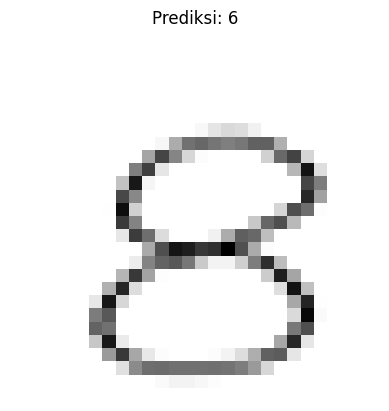

In [ ]:
# Membaca gambar (pastikan 28x28 piksel dan grayscale)
image_path = 'Angka_8_wh.jpg'  # Ganti dengan nama file gambar kamu
img = Image.open(image_path).convert('L')  # Convert ke grayscale
img = img.resize((28, 28))  # Resize ke 28x28
img_array = np.array(img)

# Invers warna jika background putih (optional, tergantung gambar)
img_array = 255 - img_array

# Normalisasi dan ubah bentuk
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi: {predicted_label}')
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


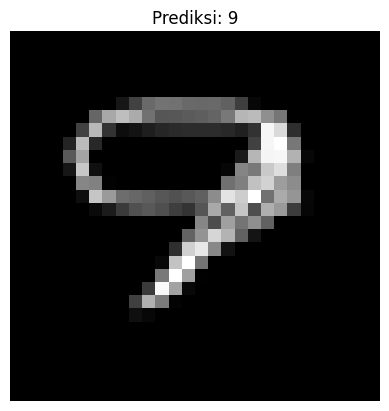

In [ ]:
# Membaca gambar (pastikan 28x28 piksel dan grayscale)
image_path = 'Angka_9_bl.jpg'  # Ganti dengan nama file gambar kamu
img = Image.open(image_path).convert('L')  # Convert ke grayscale
img = img.resize((28, 28))  # Resize ke 28x28
img_array = np.array(img)

# Invers warna jika background putih (optional, tergantung gambar)
img_array = 255 - img_array

# Normalisasi dan ubah bentuk
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi: {predicted_label}')
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


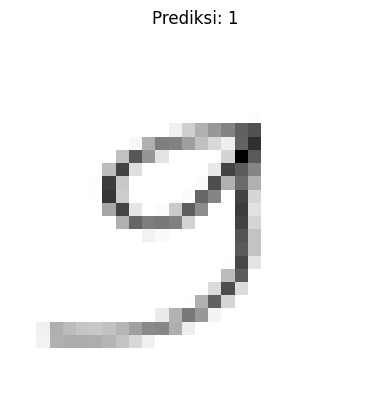

In [ ]:
# Membaca gambar (pastikan 28x28 piksel dan grayscale)
image_path = 'Angka_9_wh.jpg'  # Ganti dengan nama file gambar kamu
img = Image.open(image_path).convert('L')  # Convert ke grayscale
img = img.resize((28, 28))  # Resize ke 28x28
img_array = np.array(img)

# Invers warna jika background putih (optional, tergantung gambar)
img_array = 255 - img_array

# Normalisasi dan ubah bentuk
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi: {predicted_label}')
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


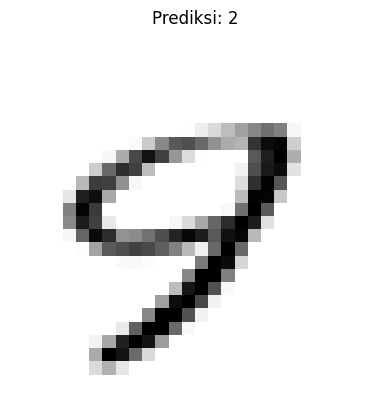

In [ ]:
# Membaca gambar (pastikan 28x28 piksel dan grayscale)
image_path = 'Angka_9.2_wh.jpg'  # Ganti dengan nama file gambar kamu
img = Image.open(image_path).convert('L')  # Convert ke grayscale
img = img.resize((28, 28))  # Resize ke 28x28
img_array = np.array(img)

# Invers warna jika background putih (optional, tergantung gambar)
img_array = 255 - img_array

# Normalisasi dan ubah bentuk
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi: {predicted_label}')
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


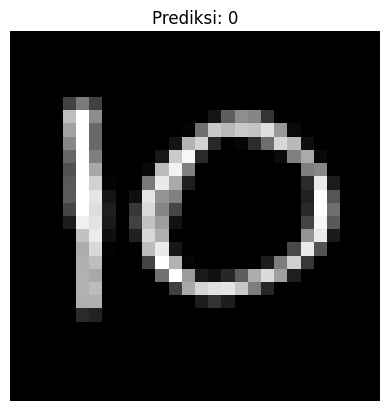

In [ ]:
# Membaca gambar (pastikan 28x28 piksel dan grayscale)
image_path = 'Angka_10_bl.jpg'  # Ganti dengan nama file gambar kamu
img = Image.open(image_path).convert('L')  # Convert ke grayscale
img = img.resize((28, 28))  # Resize ke 28x28
img_array = np.array(img)

# Invers warna jika background putih (optional, tergantung gambar)
img_array = 255 - img_array

# Normalisasi dan ubah bentuk
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi: {predicted_label}')
plt.axis('off')
plt.show()


In [ ]:
# Menyimpan ke Google Drive
from google.colab import drive
drive.mount('/content/drive')

model.save('/content/drive/MyDrive/model_digit_recognizer.h5')


Mounted at /content/drive


In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/model_digit_recognizer.h5')


#NEXT


In [ ]:
# Mount Google Drive dulu
from google.colab import drive
drive.mount('/content/drive')

# Load model dari Google Drive
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/model_digit_recognizer.h5')
